In [19]:
#Load all required library
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import seaborn as sns
from scipy.stats import zscore
#Decision tree does not take strings as input for the model fit step so importing count vector
from sklearn.feature_extraction.text import CountVectorizer  

### Import Iris.csv

In [3]:
# Importing data & Storing in data frame (Data was provided in internal lab-3)
Iris = pd.read_csv("C:/Users/Tanu/Desktop/Greatleaning/3_Nov'18/Internal_Lab/Iris.txt", delimiter=',',header= None )

# Adding Column names to Iris Data
Iris.columns = ['sepal length in cm','sepal width in cm', 'petal length in cm','petal width in cm','class']
Iris.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check dimension of data
Iris.shape

(150, 5)

In [5]:
#Check data Type
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
#Checking if any missing value in Iris data
Iris.isnull().values.any()

# Output result'False' shows "No Null values found"

False

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [7]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# initiate labelencoder object
le = LabelEncoder()

In [8]:
#apply le on 'class' columns (In the provided dataset, 'species' is labled as 'class')
Iris['class']=le.fit_transform(Iris['class'])

In [9]:
# Checking column value after conversion
Iris['class'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
# Slicing the data into dependent & independent variable where species - 'Class' column is dependent variable
# & rest of the columns are dependent variables 

In [10]:
# Dividing the data set into feature(X) set by keeping only those independent  

X = Iris.drop({'class'}, axis=1)

# Seeing output
X.head()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Dividing the data set into target(Y) set 
y = Iris[['class']]

# Seeing output
y.head()

,class
0,0
1,0
2,0
3,0
4,0


### Find the distribution of target variable (Class) (1 Marks)

In [13]:
#to check the distribution of target variable
# class distribution
print(Iris.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


### Plot the distribution of target variable using histogram

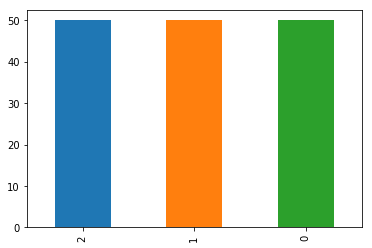

In [14]:
Iris['class'].value_counts().plot(kind='bar')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

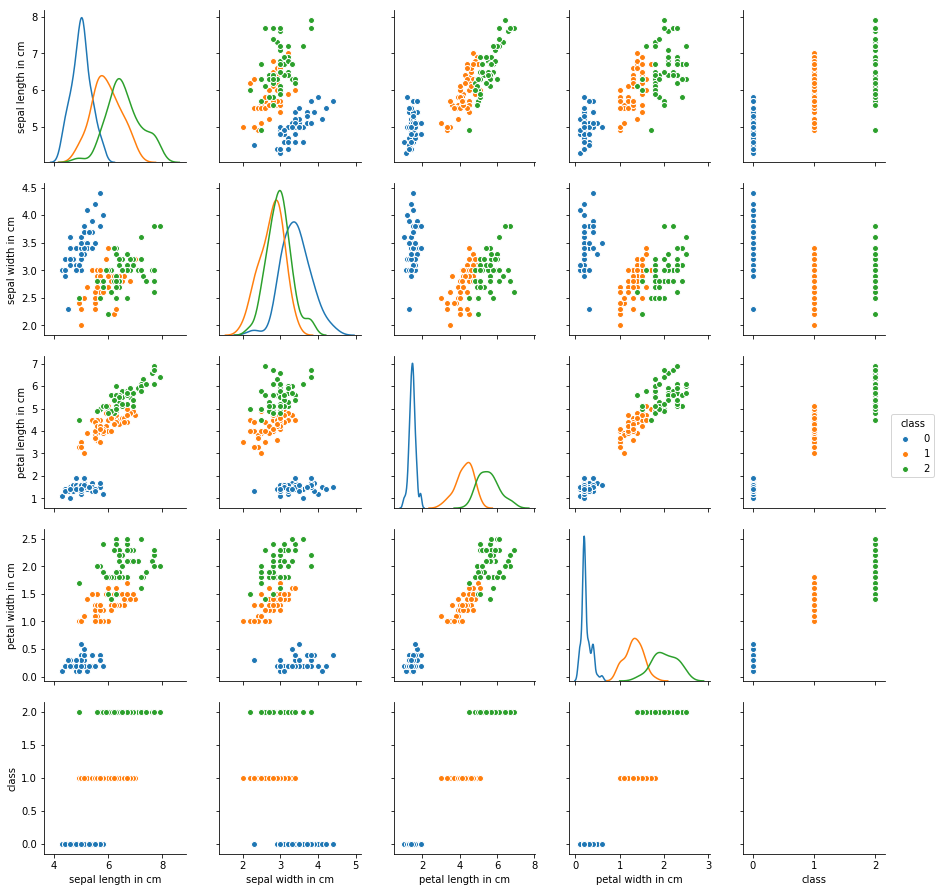

In [35]:
#  scatter plots for all variable 

sns.pairplot(Iris, hue="class",diag_kind="kde")

In [ ]:
# Insight- pairplots
# Class - 0 i.e.Iris - setosa has distinguished characteristics compared to the other two classes
# other two classes are not very much dinguish & their datapoint are overlapping basis features

# 'Class' variable is seemed to having linear relationship with sepal length, petal length & petal width 
# 'Sepal width' is nor showing proper linear relationship
# Sepal width & sepal length are near normal distribution class wise


### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [20]:
Iris.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#Insights- Summary stats

# Sepal length
# Mean & median are almost same for  'Sepal length' variable - seems to be normally distributed variable
# data is not skewed as no long tail is showing up with max obseravtion

# Sepal width
# Mean & median are almost same for  'Sepal width' variable - seems to be normally distributed variable
# data is not skewed as no long tail is showing up with max obseravtion

# Variance is less between the observations of sepal width compared to sepal lengthS 

In [ ]:
#Drop Id variable from data

# No column name as 'Id' is available in the provided dataset (Dataset was provided in internal lab-3)

# But if Id variable would be available, in that case code will be writtten as below

# Iris1 = Iris.drop(labels = "id", axis = 1)


### Correlation among all variables and give your insights (1 Marks)

In [21]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

#Calculating Correlation function
Iris.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
# Insight- correlation

# 'Class' variable is strongly positively correlated with Sepal Length, Petal Length & Petal Width 
# 'Class' variable is negatively correlated with Sepal width but correlation between both the variable is not very strong. 

# 'Sepal length' is strongly positively correlated with petal length & petal width but no significant correlation with 'Sepal width'

# 'Sepal width has week negative correlation with Petal length & Petal width

### Split data in Training and Validation in 80:20 (1 Marks)

In [22]:
# Importing train, test & split
from sklearn.model_selection import train_test_split

In [23]:
### SPLITTING INTO TRAINING AND TEST SETS in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

### Do Feature Scaling ( 1 Marks)

In [24]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe


X1 = X.apply(zscore)  # convert all attributes to Z scale 

X1.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Train and Fit NaiveBayes Model(2 Marks)

In [25]:
### SPLITTING INTO TRAINING AND TEST SETS in 80:20 ratio

train_set, test_set, train_labels, test_labels = train_test_split(X1, y, test_size=0.20, random_state=1)

In [26]:
#Fit the model
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

In [27]:
model.score(train_set , train_labels)      # performance on test data

0.95

In [28]:
#Predict
test_pred = model.predict(test_set)

In [29]:
test_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [29]:
# show Confusion Matrix
print(metrics.confusion_matrix(test_labels, test_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [30]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, test_pred)

0.9666666666666667

In [34]:
#Show precision & Recall metrics
print(metrics.classification_report(test_labels, test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30



In [ ]:
# Accurecy of this model is around 97%. 
#Overall, model is able to predict 97% cases correctly 

# Recall:
# Recall for class 0 & 2 is 100%.
# for class -1 , model is able to classify 92% positive cases correctly among all the overall positive cases for all classes,i.e 0,1,2.

# Precision:
# Precision for class 0 & 1 is 100%
# for class 2 , interpretation will be - Model is able to classify 86% positive cases for class-2 correctly , among all the overall cases for this perticular class. i.e. class-2.
